In [6]:
import requests
from bs4 import BeautifulSoup
import geocoder
import time
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import dotenv_values
config = dotenv_values("api.env")

In [7]:
university_list = []
city_list = []
state_list = []
founding_date_list = []
students_list = []
staff_list = []
setting_list = []
latitude_list = []
longitude_list = []
air_quality_list = []
states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}
inv_state = {v: k for k, v in states.items()}


In [8]:
outer_request = requests.get('https://www.4icu.org/us/')
outer_html = outer_request.text
outer_soup = BeautifulSoup(outer_html, 'html.parser')
tbody = outer_soup.find('tbody')
university_a = tbody.find_all('a')
for i in university_a:
    university_list.append(i.text)
    linkEnd = i.get('href')
    inner_request = requests.get(f'https://www.4icu.org/{linkEnd}')
    inner_html = inner_request.text
    inner_soup = BeautifulSoup(inner_html, 'html.parser')
    try:    
        city = inner_soup.find('span',itemprop='addressLocality').text
    except:
        break
    city_list.append(city)
    state = inner_soup.find('span',itemprop='addressRegion').text
    state_list.append(state)
    founded = inner_soup.find('span',itemprop='foundingDate').text
    founding_date_list.append(founded)
    uni_stat1 = inner_soup.find_all('div',class_='col-md-6')[1]
    uni_stat2 = inner_soup.find_all('div',class_='col-md-6')[2]
    g = geocoder.mapquest(f'{city}, {inv_state[state]}', key=config['map_quest'])
    latitude = g.lat
    longitude = g.lng
    latitude_list.append(g.lat)
    longitude_list.append(g.lng)
    air_key = config['open_weather']
    air_api = f'http://api.openweathermap.org/data/2.5/air_pollution?lat={latitude}&lon={longitude}&appid={air_key}'
    air_response = requests.request("GET", air_api)
    air_quality_list.append(air_response.json()['list'][0]['main']['aqi'])
    try:
        students = int(uni_stat1.find_all('strong')[0].text.split('-')[1].replace(',',''))
    except:
        students = 'N/A'
    try:
        staff = int(uni_stat1.find_all('strong')[1].text.split('-')[1].replace(',',''))
    except:
        staff = 'N/A'
    students_list.append(students)
    staff_list.append(staff)
    try:
        setting = uni_stat2.find_all('strong')[1].text
    except:
        setting = 'N/A'
    setting_list.append(setting)
    time.sleep(1)

    

In [83]:
west = ["CA", "OR", "WA", "NV", "ID", "UT", "CO", "WY", "MT"]
midwest = ["ND", "SD", "NE", "KS", "MN", "IA", "MO", "WI", "IL", "IN", "MI", "OH"]
southwest = ["AZ", "NM", "TX", "OK"]
southeast = ["AR", "LA", "MS", "TN", "AL", "KY", "GA", "WV", "VA", "NC", "SC", "FL", "MD", "DE"]
northeast = ["CT", "DC", "HI", "ME", "MA", "NH", "NJ", "NY", "PA", "RI", "VT"]
noncontig = ["HI", "AK"]
region = []
for i in state_list:
    curr = inv_state[i]
    if curr in west:
        region.append('West')
    elif curr in midwest:
        region.append('Midwest')
    elif curr in southwest:
        region.append('Southwest')
    elif curr in southeast:
        region.append('Southeast')
    elif curr in northeast:
        region.append('Northeast')
    elif curr in noncontig:
        region.append('Outside')
    else:
        region.append('N/A')
rank = [*range(1,len(university_list)+1)]

In [90]:
university_series = pd.Series(university_list)
rank_series = pd.Series(rank)
city_series = pd.Series(city_list)
state_series = pd.Series(state_list)
region_series = pd.Series(region)
founding_date_series = pd.Series(founding_date_list)
students_series = pd.Series(students_list)
staff_series = pd.Series(staff_list)
setting_series = pd.Series(setting_list)
latitude_series = pd.Series(latitude_list)
longitude_series = pd.Series(longitude_list)
air_quality_series = pd.Series(air_quality_list)
data={
    'Ranking':rank_series,
    'University':university_series,
    'City':city_series,
    'State':state_series,
    'Region':region_series,
    'Founded':founding_date_series,
    'Students_count':students_series,
    'Staff_count':staff_series,
    'Setting':setting_series,
    'Latitude':latitude_series,
    'Longitude':longitude_series,
    'Air_quality':air_quality_series
}
df = pd.concat(data,axis=1)


In [91]:
df.drop(df.tail(1).index,inplace=True)
df.tail(1)

,Ranking,University,City,State,Region,Founded,Students_count,Staff_count,Setting,Latitude,Longitude,Air_quality
1764,1765,Ohio University-Chillicothe,Chillicothe,Ohio,Midwest,1946,2999,199,Rural,39.331846,-82.981776,2.0


In [92]:
df.sort_values(by=['Air_quality'],ascending=False)

,Ranking,University,City,State,Region,Founded,Students_count,Staff_count,Setting,Latitude,Longitude,Air_quality
373,374,"California State University, Dominguez Hills",Carson,California,West,1960,19999,999,Urban,33.831590,-118.263583,5.0
320,321,Biola University,La Mirada,California,West,1908,6999,299,Suburban,33.908859,-118.011725,5.0
1741,1742,The University of West Los Angeles,Inglewood,California,West,1966,250,N/A,Suburban,33.961767,-118.353336,5.0
1745,1746,Bethesda University,Anaheim,California,West,1976,499,N/A,Urban,33.834492,-117.915638,5.0
1170,1171,Brandman University,Irvine,California,West,2009,14999,799,Urban,33.685908,-117.824719,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
371,372,Eastern Washington University,Cheney,Washington,West,1882,19999,699,Suburban,47.495512,-117.575534,1.0
372,373,Maryville University,St. Louis,Missouri,Midwest,1872,14999,899,Suburban,38.630276,-90.200309,1.0
376,377,University of Wisconsin-Green Bay,Green Bay,Wisconsin,Midwest,1965,8999,399,Urban,44.513288,-88.013256,1.0
377,378,St. Olaf College,Northfield,Minnesota,Midwest,1874,3999,399,Suburban,44.475627,-93.193244,1.0


In [93]:
df.sort_values(by=['Air_quality'],ascending=True)

,Ranking,University,City,State,Region,Founded,Students_count,Staff_count,Setting,Latitude,Longitude,Air_quality
1400,1401,Bismarck State College,Bismarck,North Dakota,Midwest,1939,4999,199,Urban,46.805370,-100.781609,1.0
434,435,Willamette University,Salem,Oregon,West,1842,2999,299,Urban,44.939016,-123.039307,1.0
419,420,Lewis & Clark College,Portland,Oregon,West,1867,3999,499,Urban,45.516018,-122.681425,1.0
418,419,University of Wisconsin-La Crosse,La Crosse,Wisconsin,Midwest,1909,14999,599,Urban,43.808767,-91.251860,1.0
1460,1461,The University of Montana Western,Dillon,Montana,West,1893,1999,199,Rural,45.214690,-112.634606,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1591,1592,Marshall B. Ketchum University,Fullerton,California,West,1904,999,199,Suburban,33.870345,-117.924302,5.0
767,768,Whittier College,Whittier,California,West,1887,2999,199,Suburban,33.967318,-118.048051,5.0
1745,1746,Bethesda University,Anaheim,California,West,1976,499,N/A,Urban,33.834492,-117.915638,5.0
373,374,"California State University, Dominguez Hills",Carson,California,West,1960,19999,999,Urban,33.831590,-118.263583,5.0


In [94]:
best = df[df['Air_quality'] == 1]
best.sort_values(by=['Ranking'],ascending=True)
best.to_csv('best_air.csv')
best

,Ranking,University,City,State,Region,Founded,Students_count,Staff_count,Setting,Latitude,Longitude,Air_quality
2,3,Stanford University,Stanford,California,West,1885,24999,2499,Suburban,37.437516,-122.165747,1.0
9,10,University of Minnesota-Twin Cities,Minneapolis,Minnesota,Midwest,1851,45000,4499,Urban,44.977479,-93.264346,1.0
13,14,The University of Texas at Austin,Austin,Texas,Southwest,1883,45000,3499,Urban,30.264979,-97.746598,1.0
23,24,University of Florida,Gainesville,Florida,Southeast,1853,45000,5000,Urban,29.651958,-82.325024,1.0
27,28,University of North Carolina at Chapel Hill,Chapel Hill,North Carolina,Southeast,1789,34999,4999,Urban,35.910262,-79.055474,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1740,1741,New Hope Christian College,Eugene,Oregon,West,1925,250,N/A,Urban,44.052153,-123.091195,1.0
1743,1744,Denver College of Nursing,Denver,Colorado,West,,1999,199,Urban,39.738453,-104.984853,1.0
1756,1757,Irell and Manella Graduate School of Biologica...,Duarte,California,West,1994,250,50,Suburban,34.139586,-117.973256,1.0
1757,1758,Antioch University Santa Barbara,Santa Barbara,California,West,1977,499,199,Urban,34.420867,-119.698342,1.0


In [95]:
worst = df[df['Air_quality'] == 5]
worst.sort_values(by=['Air_quality'],ascending=True)
worst


,Ranking,University,City,State,Region,Founded,Students_count,Staff_count,Setting,Latitude,Longitude,Air_quality
154,155,"California State University, Fullerton",Fullerton,California,West,1957,45000,2499,Suburban,33.870345,-117.924302,5.0
320,321,Biola University,La Mirada,California,West,1908,6999,299,Suburban,33.908859,-118.011725,5.0
373,374,"California State University, Dominguez Hills",Carson,California,West,1960,19999,999,Urban,33.831590,-118.263583,5.0
767,768,Whittier College,Whittier,California,West,1887,2999,199,Suburban,33.967318,-118.048051,5.0
859,860,Concordia University Irvine,Irvine,California,West,1976,5999,199,Urban,33.685908,-117.824719,5.0
1170,1171,Brandman University,Irvine,California,West,2009,14999,799,Urban,33.685908,-117.824719,5.0
1333,1334,Vanguard University of Southern California,Costa Mesa,California,West,1920,2999,99,Urban,33.663857,-117.904765,5.0
1381,1382,Hope International University,Fullerton,California,West,1928,1999,199,Suburban,33.870345,-117.924302,5.0
1591,1592,Marshall B. Ketchum University,Fullerton,California,West,1904,999,199,Suburban,33.870345,-117.924302,5.0
1741,1742,The University of West Los Angeles,Inglewood,California,West,1966,250,N/A,Suburban,33.961767,-118.353336,5.0


<BarContainer object of 6 artists>

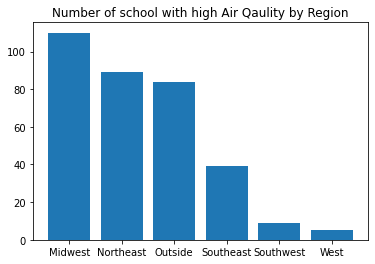

In [96]:
best_regions_count = best.Region.value_counts()
best_states_Count = best.State.value_counts()
best_regions_count
plt.title('Number of school with high Air Qaulity by Region')
plt.bar(['Midwest', 'Northeast', 'Outside', 'Southeast', 'Southwest', 'West'],best_regions_count)


<BarContainer object of 5 artists>

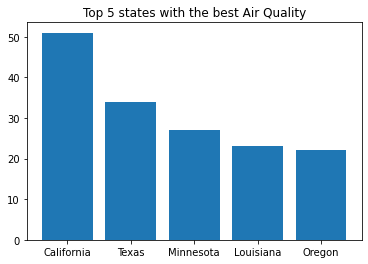

In [98]:
plt.title('Top 5 states with the best Air Quality')
plt.bar(list(best_states_Count.keys())[:5],best_states_Count[:5])

In [109]:
worst_regions_count = worst.Region.value_counts()
worst_states_count = worst.State.value_counts()
worst_states_count

California    11
Name: State, dtype: int64

In [116]:
region_group = df.groupby(['Region'])
region_mean = region_group.mean().sort_values(by=['Air_quality'],ascending=True)
group = pd.DataFrame(region_mean)
group.to_csv()

'Region,Ranking,Latitude,Longitude,Air_quality\r\nOutside,1144.0,61.4340644,-146.217032,1.0\r\nSouthwest,884.2878787878788,32.38021871969697,-98.84998250000001,1.7424242424242424\r\nSoutheast,933.7354838709678,34.3929699655914,-83.38185490322581,1.8279569892473118\r\nMidwest,930.9082969432314,41.48556191921397,-89.58338573362445,1.8842794759825328\r\nWest,804.688524590164,38.82614863934426,-117.70853719672131,1.9057377049180328\r\nNortheast,822.4772234273319,41.348320470715834,-75.32387153362255,2.015184381778742\r\n'

In [121]:
state_group = df.groupby(['State'])
state_mean = state_group.mean().sort_values(by=['Air_quality'],ascending=True)
state_mean

,Ranking,Latitude,Longitude,Air_quality
State,,,,
Alaska,1144.000000,61.434064,-146.217032,1.000000
Oregon,778.818182,44.857613,-122.629761,1.000000
Idaho,713.875000,44.290654,-115.489561,1.000000
Louisiana,904.480000,30.864558,-91.541534,1.080000
Hawaii,730.500000,21.106456,-157.444647,1.166667
Minnesota,809.914286,45.106099,-93.627821,1.228571
Nevada,1037.750000,37.898016,-116.943951,1.250000
Nebraska,1060.238095,41.132669,-96.940588,1.285714
Montana,967.222222,46.443911,-111.135896,1.444444


In [102]:
df.to_csv('original.csv')

In [124]:
setting_group = df.groupby(['Setting'])
setting_mean = region_group.mean().sort_values(by=['Air_quality'],ascending=True)
setting_mean

,Ranking,Latitude,Longitude,Air_quality
Setting,,,,
Rural,1050.164865,39.210742,-89.507414,1.832432
Urban,816.310588,38.101278,-90.234261,1.876471
Suburban,872.025878,38.950338,-86.635812,1.961183
Christian-Catholic,1631.000000,36.166687,-86.779932,2.000000
N/A,891.000000,35.757807,-84.201451,2.000000


In [ ]:
best_regions_count = best.Region.value_counts()
best_states_Count = best.State.value_counts()
best_regions_count
plt.title('Number of school with high Air Qaulity by Region')
plt.bar(['Midwest', 'Northeast', 'Outside', 'Southeast', 'Southwest', 'West'],best_regions_count)

In [125]:
best_setting_count = best.Setting.value_counts()
best_setting_count
plt.title('Number of school with high Air Qaulity by Setting')
plt.bar(list(best_states_Count.keys()),best_regions_count)

Urban       189
Suburban     78
Rural        69
Name: Setting, dtype: int64